# Statistical Thinking in Python (Part 2)

Using PDF and CDF is better than histograms because there doesn't exist the binning bias (how many bins do I need to plot a good histogram?).

## Parameter estimation by optimization

### Optimal Parameters

Histogram of Michelson's measurements
<img src='figures/01.04-normal-comparison.PNG' width="400">
CDF of Michelsons's measurements
<img src='figures/02.01-cdf-michelsons.PNG' width="400">
CDF with bad estimate of st.dev.
<img src='figures/02.01-badcdf-michelsons.PNG' width="400">
CDF with bad estimate of mean
<img src='figures/02.01-badcdfmean-michelsons.PNG' width="400">

- Parameter values that bring the model in closest agreement with the data

Mass of MA large mouth bass
<img src='figures/02.01-bettercdf-michelsons.PNG' width="400">
Packages to do statistical inference
<img src='figures/02.01-statspackages.PNG' width="300">

#### Practice

**How often do we get no-hitters?**

The number of games played between each no-hitter in the modern era (1901-2015) of Major League Baseball is stored in the array nohitter_times.

If you assume that no-hitters are described as a Poisson process, then the time between no-hitters is Exponentially distributed. As you have seen, the Exponential distribution has a single parameter, which we will call , the typical interval time. The value of the parameter  that makes the exponential distribution best match the data is the mean interval time (where time is in units of number of games) between no-hitters.

Compute the value of this parameter from the data. Then, use np.random.exponential() to "repeat" the history of Major League Baseball by drawing inter-no-hitter times from an exponential distribution with the  you found and plot the histogram as an approximation to the PDF.

NumPy, pandas, matlotlib.pyplot, and seaborn have been imported for you as np, pd, plt, and sns, respectively.

Instructions
- Seed the random number generator with 42.
- Compute the mean time (in units of number of games) between no-hitters.
- Draw 100,000 samples from an Exponential distribution with the parameter you computed from the mean of the inter-no-hitter times.
- Plot the theoretical PDF using plt.hist(). Remember to use keyword arguments bins=50, normed=True, and histtype='step'. Be sure to label your axes.
- Show your plot.

Hint
-You can use NumPy's random.seed() function to seed the random number generator with 42.
- To compute the mean time, use Numpy's mean function (np.mean()), passing in the array nohitter_times as an argument.
- Use np.random.exponential() to draw samples from an Exponential distribution. The first argument to the function should be the parameter tau you calculated above, while the second argument should be the desired sample size.
- Use plt.hist() with the keyword arguments mentioned in the instructions. Be sure to watch for typos!
- To display your plot, use plt.show().

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
nohitter_times = np.array([ 843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
        715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
        104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
        166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
        308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
       1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
         77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
        557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
       1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
        219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
        176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
        774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
        192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
        156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
        576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
       3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
        110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
        192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
       1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
       2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
       1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
        420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
        876,  381,  905,  156,  419,  239,  119,  129,  467])

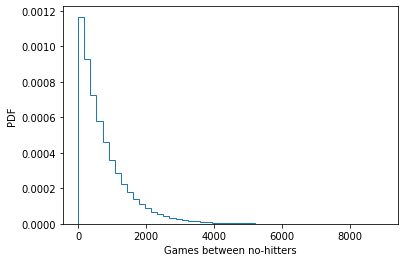

In [4]:
# Seed random number generator
np.random.seed(42)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)

# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
plt.hist(inter_nohitter_time, bins=50, density=True, histtype='step')
plt.xlabel('Games between no-hitters')
plt.ylabel('PDF')

# Show the plot
plt.show()

Nice work! We see the typical shape of the Exponential distribution, going from a maximum at 0 and decaying to the right.

**Do the data follow our story?**

You have modeled no-hitters using an Exponential distribution. Create an ECDF of the real data. Overlay the theoretical CDF with the ECDF from the data. This helps you to verify that the Exponential distribution describes the observed data.

It may be helpful to remind yourself of the function you created in the previous course to compute the ECDF, as well as the code you wrote to plot it.

Instructions

- Compute an ECDF from the actual time between no-hitters (nohitter_times). Use the ecdf() function you wrote in the prequel course.
- Create a CDF from the theoretical samples you took in the last exercise (inter_nohitter_time).
- Plot x_theor and y_theor as a line using plt.plot(). Then overlay the ECDF of the real data x and y as points. To do this, you have to specify the keyword arguments marker = '.' and linestyle = 'none' in addition to x and y inside plt.plot().
- Set a 2% margin on the plot.
- Show the plot.


Hint
- To compute the ECDF of nohitter_times, pass it as an argument to the ecdf() function.
- To create the CDF from the theoretical samples, use the ecdf() function once again, passing in the array of the samples you took in the previous exercise (inter_nohitter_time).
- To plot the CDF as a line, pass in x_theor and y_theor as arguments to plt.plot(). To overlay the real data as points, use plt.plot() with the arguments x, y, marker = '.' and linestyle = 'none'.
- You can set margins by passing in the desired margin as an argument to plt.margins().
- To display the plot, use plt.show().

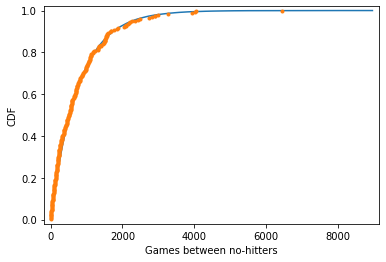

In [5]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()

It looks like no-hitters in the modern era of Major League Baseball are Exponentially distributed. Based on the story of the Exponential distribution, this suggests that they are a random process; when a no-hitter will happen is independent of when the last no-hitter was.

**How is this parameter optimal?**

Now sample out of an exponential distribution with  being twice as large as the optimal . Do it again for  half as large. Make CDFs of these samples and overlay them with your data. You can see that they do not reproduce the data as well. Thus, the  you computed from the mean inter-no-hitter times is optimal in that it best reproduces the data.

Note: In this and all subsequent exercises, the random number generator is pre-seeded for you to save you some typing.

Instructions
- Take 10000 samples out of an Exponential distribution with parameter  = tau/2.
- Take 10000 samples out of an Exponential distribution with parameter  = 2*tau.
- Generate CDFs from these two sets of samples using your ecdf() function.
- Add these two CDFs as lines to your plot. This has been done for you, so hit 'Submit Answer' to view the plot!

Hint
- You can use the function np.random.exponential() to draw samples from an Exponential distribution. The first argument should be the parameter (either tau/2 or 2*tau), while the second argument should be the sample size (10000 in both cases).
- To generate CDFs from the samples you drew, use the ecdf() function. Remember to unpack it appropriately. For example, to unpack it into x and y, you would use the command x, y = ecdf(data).

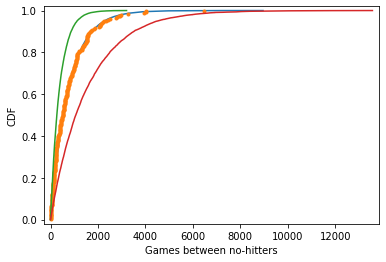

In [6]:
# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2, 10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(2*tau, 10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half)
_ = plt.plot(x_double, y_double)

# Show the plot
plt.show()

Great work! Notice how the value of tau given by the mean matches the data best. In this way, tau is an optimal parameter.

### Linear Regression by least squares

Linear regression: 2008 US swing state election results
<img src='figures/02.01-linearreg.PNG' width="400">

Residuals
<img src='figures/02.01-linearreg-res.PNG' width="400">

**Least squares**
- The process of finding the parameters for which the sum of the squares of the residuals is minimal

In [ ]:
# Least squares with np.polyfit()

slope, intercept = np.polyfit(total_votes,dem_share, 1)
# slope
4.0370717009465555e-05
# intercept
40.113911968641744

#### Practice

**EDA of literacy/fertility data**

In the next few exercises, we will look at the correlation between female literacy and fertility (defined as the average number of children born per woman) throughout the world. For ease of analysis and interpretation, we will work with the illiteracy rate.

It is always a good idea to do some EDA ahead of our analysis. To this end, plot the fertility versus illiteracy and compute the Pearson correlation coefficient. The Numpy array illiteracy has the illiteracy rate among females for most of the world's nations. The array fertility has the corresponding fertility data.

Here, it may be useful to refer back to the function you wrote in the previous course to compute the Pearson correlation coefficient.

Instructions
- Plot fertility (y-axis) versus illiteracy (x-axis) as a scatter plot.
- Set a 2% margin.
- Compute and print the Pearson correlation coefficient between illiteracy and fertility.

Hint
- A scatter plot can be built using plt.plot(). The first two arguments should be, in order, the x-axis (illiteracy) and y-axis (fertility). The next to arguments specify the marker and linestyle.
- You can set the desired margin using plt.margin().
- You can use plt.xlabel('X-axis label') and plt.ylabel('Y-axis label') to label your axes.
- Remind yourself of the pearson_r() function you wrote in the previous course to compute the Pearson correlation coefficient.

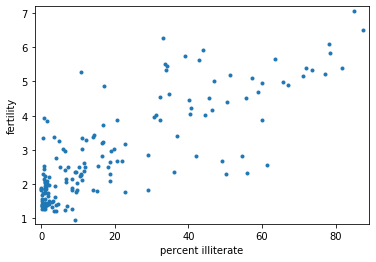

0.8041324026815341


In [9]:
illiteracy = np.array([
    9.5, 49.2, 1., 11.2, 9.8, 60., 50.2, 51.2, 0.6, 1., 8.5, 6.1, 9.8, 1.,
    42.2, 77.2, 18.7, 22.8, 8.5, 43.9, 1., 1., 1.5, 10.8, 11.9, 3.4, 0.4, 3.1,
    6.6, 33.7, 40.4, 2.3, 17.2, 0.7, 36.1, 1., 33.2, 55.9, 30.8, 87.4, 15.4,
    54.6, 5.1, 1.1, 10.2, 19.8, 0., 40.7, 57.2, 59.9, 3.1, 55.7, 22.8, 10.9,
    34.7, 32.2, 43., 1.3, 1., 0.5, 78.4, 34.2, 84.9, 29.1, 31.3, 18.3, 81.8,
    39., 11.2, 67., 4.1, 0.2, 78.1, 1., 7.1, 1., 29., 1.1, 11.7, 73.6, 33.9,
    14., 0.3, 1., 0.8, 71.9, 40.1, 1., 2.1, 3.8, 16.5, 4.1, 0.5, 44.4, 46.3,
    18.7, 6.5, 36.8, 18.6, 11.1, 22.1, 71.1, 1., 0., 0.9, 0.7, 45.5, 8.4, 0.,
    3.8, 8.5, 2., 1., 58.9, 0.3, 1., 14., 47., 4.1, 2.2, 7.2, 0.3, 1.5, 50.5,
    1.3, 0.6, 19.1, 6.9, 9.2, 2.2, 0.2, 12.3, 4.9, 4.6, 0.3, 16.5, 65.7, 63.5,
    16.8, 0.2, 1.8, 9.6, 15.2, 14.4, 3.3, 10.6, 61.3, 10.9, 32.2, 9.3, 11.6,
    20.7, 6.5, 6.7, 3.5, 1., 1.6, 20.5, 1.5, 16.7, 2., 0.9
])

fertility = np.array([
    1.769, 2.682, 2.077, 2.132, 1.827, 3.872, 2.288, 5.173, 1.393, 1.262,
    2.156, 3.026, 2.033, 1.324, 2.816, 5.211, 2.1, 1.781, 1.822, 5.908, 1.881,
    1.852, 1.39, 2.281, 2.505, 1.224, 1.361, 1.468, 2.404, 5.52, 4.058, 2.223,
    4.859, 1.267, 2.342, 1.579, 6.254, 2.334, 3.961, 6.505, 2.53, 2.823, 2.498,
    2.248, 2.508, 3.04, 1.854, 4.22, 5.1, 4.967, 1.325, 4.514, 3.173, 2.308,
    4.62, 4.541, 5.637, 1.926, 1.747, 2.294, 5.841, 5.455, 7.069, 2.859, 4.018,
    2.513, 5.405, 5.737, 3.363, 4.89, 1.385, 1.505, 6.081, 1.784, 1.378, 1.45,
    1.841, 1.37, 2.612, 5.329, 5.33, 3.371, 1.281, 1.871, 2.153, 5.378, 4.45,
    1.46, 1.436, 1.612, 3.19, 2.752, 3.35, 4.01, 4.166, 2.642, 2.977, 3.415,
    2.295, 3.019, 2.683, 5.165, 1.849, 1.836, 2.518, 2.43, 4.528, 1.263, 1.885,
    1.943, 1.899, 1.442, 1.953, 4.697, 1.582, 2.025, 1.841, 5.011, 1.212,
    1.502, 2.516, 1.367, 2.089, 4.388, 1.854, 1.748, 2.978, 2.152, 2.362,
    1.988, 1.426, 3.29, 3.264, 1.436, 1.393, 2.822, 4.969, 5.659, 3.24, 1.693,
    1.647, 2.36, 1.792, 3.45, 1.516, 2.233, 2.563, 5.283, 3.885, 0.966, 2.373,
    2.663, 1.251, 2.052, 3.371, 2.093, 2., 3.883, 3.852, 3.718, 1.732, 3.928
])

# --------
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]
# ----------

# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print(pearson_r(illiteracy, fertility))

You can see the correlation between illiteracy and fertility by eye, and by the substantial Pearson correlation coefficient of 0.8. It is difficult to resolve in the scatter plot, but there are many points around near-zero illiteracy and about 1.8 children/woman.

**Linear regression**

We will assume that fertility is a linear function of the female illiteracy rate. That is, , where  is the slope and  is the intercept. We can think of the intercept as the minimal fertility rate, probably somewhere between one and two. The slope tells us how the fertility rate varies with illiteracy. We can find the best fit line using np.polyfit().

Plot the data and the best fit line. Print out the slope and intercept. (Think: what are their units?)

Instructions
- Compute the slope and intercept of the regression line using np.polyfit(). Remember, fertility is on the y-axis and illiteracy on the x-axis.
- Print out the slope and intercept from the linear regression.
- To plot the best fit line, create an array x that consists of 0 and 100 using np.array(). Then, compute the theoretical values of y based on your regression parameters. I.e., y = a * x + b.
- Plot the data and the regression line on the same plot. Be sure to label your axes.
- Hit 'Submit Answer' to display your plot.

Hint
- Remember to include 1 as an argument to np.polyfit() in addition to illiteracy and fertility. This is because our linear functions are polynomials of degree 1.
- The code to print out the slope and intercept has already been provided for you; there is no need to change this.
- To create an array of 1 and 50, you can use np.array([1, 50]). Here, you want x values of 0 and 100, so use np.array() appropriately and be sure to assign the values to x. Then, you can compute y as described in the instructions.
- Pass in x and y as arguments to plt.plot() to plot the data.

slope = 0.04979854809063423 children per woman / percent illiterate
intercept = 1.888050610636557 children per woman


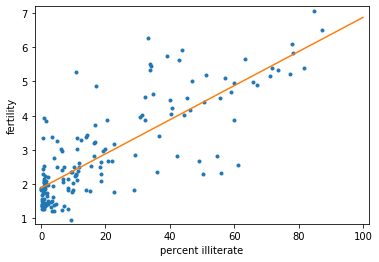

In [10]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy, fertility, 1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0, 100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()

**How is it optimal?**

The function np.polyfit() that you used to get your regression parameters finds the optimal slope and intercept. It is optimizing the sum of the squares of the residuals, also known as RSS (for residual sum of squares). In this exercise, you will plot the function that is being optimized, the RSS, versus the slope parameter a. To do this, fix the intercept to be what you found in the optimization. Then, plot the RSS vs. the slope. Where is it minimal?

Instructions
- Specify the values of the slope to compute the RSS. Use np.linspace() to get 200 points in the range between 0 and 0.1. For example, to get 100 points in the range between 0 and 0.5, you could use np.linspace() like so: np.linspace(0, 0.5, 100).
- Initialize an array, rss, to contain the RSS using np.empty_like() and the array you created above. The empty_like() function returns a new array with the same shape and type as a given array (in this case, a_vals).
- Write a for loop to compute the sum of RSS of the slope. Hint: the RSS is given by np.sum((y_data - a * x_data - b)**2). - The variable b you computed in the last exercise is already in your namespace. Here, fertility is the y_data and illiteracy the x_data.
- Plot the RSS (rss) versus slope (a_vals).
- Hit 'Submit Answer' to see the plot!

Hint
- You need 200 evenly spaced points between 0 and 0.1. To achieve this, use np.linspace() with the arguments 0, 0.1, and 200.
- As described in the instructions, you can use np.empty_like() to initialize the array. Remember to pass in the array you computed above as an argument to np.empty_like().
- Think about what our y_data and x_data here is. Refer to the plots from the previous exercises. On what axis was illiteracy? What about fertility? Once you identify the y_data and x_data, use np.sum() in the format specified in the instructions.
- When we say 'RSS versus slope', RSS is the y-axis, and slope is the x-axis. Use plt.plot() to create your plot appropriately.

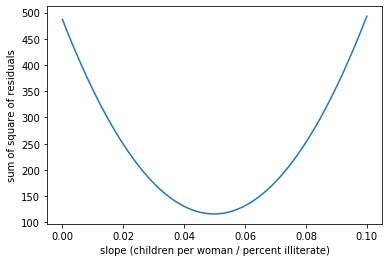

In [11]:
# Specify slopes to consider: a_vals
a_vals = np.linspace(0, 0.1, 200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a*illiteracy - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()

Great work! Notice that the minimum on the plot, that is the value of the slope that gives the minimum sum of the square of the residuals, is the same value you got when performing the regression.

### The importance of EDA: Anscombe's quartet

**Theory**
Anscombe's quartet
<img src='figures/02.01-anscombe.PNG' width="400">
Anscombe's quartet: X mean
<img src='figures/02.01-anscombe-x-mean.PNG' width="400">
Anscombe's quartet: Y mean
<img src='figures/02.01-anscombe-y-mean.PNG' width="400">
Anscombe's quartet: Linear regression 
<img src='figures/02.01-anscombe-linearreg.PNG' width="400">

**Look before you leap!**
- Do graphical EDA first!

**The importance of EDA**

Why should exploratory data analysis be the first step in an analysis of data (after getting your data imported and cleaned, of course)?

Answer the question

- You can be protected from misinterpretation of the type demonstrated by Anscombe's quartet.
- EDA provides a good starting point for planning the rest of your analysis.
- EDA is not really any more difficult than any of the subsequent analysis, so there is no excuse for not exploring the data.
- **All of these reasons!**

Yes! Always do EDA as you jump into a data set.

**Linear regression on appropriate Anscombe data**

For practice, perform a linear regression on the data set from Anscombe's quartet that is most reasonably interpreted with linear regression.

Instructions
- Compute the parameters for the slope and intercept using np.polyfit(). The Anscombe data are stored in the arrays x and y.
- Print the slope a and intercept b.
- Generate theoretical  and  data from the linear regression. Your  array, which you can create with np.array(), should consist of 3 and 15. To generate the  data, multiply the slope by x_theor and add the intercept.
- Plot the Anscombe data as a scatter plot and then plot the theoretical line. Remember to include the marker='.' and linestyle='none' keyword arguments in addition to x and y when to plot the Anscombe data as a scatter plot. You do not need these arguments when plotting the theoretical line.
- Hit 'Submit Answer' to see the plot!

Hint
- As you did several exercises earlier, use np.polyfit() to compute the parameters for the slope and intercept.
- To print the slope a and intercept b, pass them as arguments to print().
- Remember from a previous exercise where you created an array x consisting of 0 and 100, using np.array([0, 100])? Do the same, this time with different values. Use the same equation as before - a * x + b - to generate the theoretical  data.
- To create the scatter plot, you need to use plt.plot() with x and y along with the marker='.' and linestyle='none' keyword arguments. For the theoretical line, you need to use x_theor and y_theor.

0.5000909090909095 3.0000909090909076


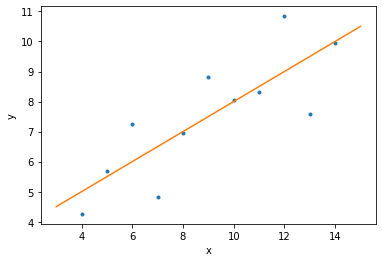

In [14]:
x = np.array([10., 8., 13., 9., 11., 14., 6., 4., 12., 7., 5.])
y = np.array(
    [8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])

# Perform linear regression: a, b
a, b = np.polyfit(x, y, 1)

# Print the slope and intercept
print(a, b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = a * x_theor + b

# Plot the Anscombe data and theoretical line
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.plot(x_theor, y_theor)

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()

**Linear regression on all Anscombe data**

Now, to verify that all four of the Anscombe data sets have the same slope and intercept from a linear regression, you will compute the slope and intercept for each set. The data are stored in lists; anscombe_x = [x1, x2, x3, x4] and anscombe_y = [y1, y2, y3, y4], where, for example, x2 and y2 are the  and  values for the second Anscombe data set.

Instructions
- Write a for loop to do the following for each Anscombe data set.
- Compute the slope and intercept.
- Print the slope and intercept.

Hint
- As you did several exercises earlier, use np.polyfit() to compute the parameters for the slope and intercept.
- To print the slope and intercept, pass them as arguments to print().

In [25]:
anscombe_x = np.array([(10., 8., 13., 9., 11., 14., 6., 4., 12., 7., 5.),
                       (10., 8., 13., 9., 11., 14., 6., 4., 12., 7., 5.),
                       (10., 8., 13., 9., 11., 14., 6., 4., 12., 7., 5.),
                       (8., 8., 8., 8., 8., 8., 8., 19., 8., 8., 8.)])

anscombe_y = np.array([
    (8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68),
    (9.14, 8.14, 8.74, 8.77, 9.26, 8.1, 6.13, 3.1, 9.13, 7.26, 4.74),
    (7.46, 6.77, 12.74, 7.11, 7.81, 8.84, 6.08, 5.39, 8.15, 6.42, 5.73),
    (6.58, 5.76, 7.71, 8.84, 8.47, 7.04, 5.25, 12.5, 5.56, 7.91, 6.89)
])

# Iterate through x,y pairs
for x, y in zip(anscombe_x, anscombe_y):
    # Compute the slope and intercept: a, b
    a, b = np.polyfit(x, y, 1)

    # Print the result
    print('slope:', a, 'intercept:', b)

slope: 0.5000909090909095 intercept: 3.0000909090909076
slope: 0.5000000000000004 intercept: 3.000909090909089
slope: 0.4997272727272731 intercept: 3.0024545454545453
slope: 0.49990909090909064 intercept: 3.0017272727272735


Great work! Indeed, they all have the same slope and intercept.

## Bootstrap confidence intervals

### Generating bootstrap replicates

**Resampling an array (with replacement)**

```
1.                                         2. 
Data:                                      Data:  
    [23.3, 27.1, 24.3, 25.7, 26.0]             [23.3, 27.1, 24.3, 25.7, 26.0]
                Mean = 25.2                                Mean = 25.2
                
Resampled data:                            Resampled data:
    [    ,     ,     ,     ,     ]             [27.1,    ,      ,      ,    ]


3.                                         Finally.
Data:                                      Data: 
    [23.3, 27.1, 24.3, 25.7, 26.0]             [23.3, 27.1, 24.3, 25.7, 26.0]
                Mean = 25.2                                Mean = 25.2
                
Resampled data:                            Resampled data:
    [27.1, 26.0,     ,      ,    ]             [27.1, 26.0, 23.3, 25.7, 23.3]
                                                           Mean =25.08
```

**Mean of resampled Michelson measurements**
<img src='figures/02.02-meanresampled.PNG' width='400'>
<!-- ![](figures/02.02-meanresampled.PNG) -->

**Bootstrapping**
- The use of resampled data to perform statistical inference

**Bootstrap sample**
- A resampled array of the data

**Bootstrap replicate**
- A statistic computed from a resampled array

**Resampling engine: np.random.choice()**
```
import numpy as np
np.random.choice([1,2,3,4,5], size=5)

array[(5, 3, 5 , 5, 2])
```

**Computing a bootstrap replicate**
```
bs_sample = np.random.choice(michelson_speed_of_light, size=100)

np.mean(bs_sample)
299847.79999999999

np.median(bs_sample)
299845.0

np.std(bs_sample)
83.564286025729331
```

**Getting the terminology down**

Getting tripped up over terminology is a common cause of frustration in students. Unfortunately, you often will read and hear other data scientists using different terminology for bootstrap samples and replicates. This is even more reason why we need everything to be clear and consistent for this course. So, before going forward discussing bootstrapping, let's get our terminology down. If we have a data set with $n$ repeated measurements, a **bootstrap sample** is an array of length $n$ that was drawn from the original data with replacement. What is a **bootstrap replicate**?

Answer the question

- Just another name for a bootstrap sample.
- **A single value of a statistic computed from a bootstrap sample.**
- An actual repeat of the measurements.

Conceptually, you can think of a bootstrap sample (not a bootstrap replicate) as a virtual repeat of the measurements.

**Bootstrapping by hand**

To help you gain intuition about how bootstrapping works, imagine you have a data set that has only three points, [-1, 0, 1]. How many unique bootstrap samples can be drawn (e.g., [-1, 0, 1] and [1, 0, -1] are unique), and what is the maximum mean you can get from a bootstrap sample? It might be useful to jot down the samples on a piece of paper.

(These are too few data to get meaningful results from bootstrap procedures, but this example is useful for intuition.)

Possible Answers
- There are 3 unique samples, and the maximum mean is 0.
- There are 10 unique samples, and the maximum mean is 0.
- There are 10 unique samples, and the maximum mean is 1.
- There are 27 unique samples, and the maximum mean is 0.
- **There are 27 unique samples, and the maximum mean is 1.**

Remember that [1, 1, 0] and [1, 0, 1] are unique samples.

Correct! There are 27 total bootstrap samples, and one of them, [1,1,1] has a mean of 1. Conversely, 7 of them have a mean of zero.

**Visualizing bootstrap samples**

In this exercise, you will generate bootstrap samples from the set of annual rainfall data measured at the Sheffield Weather Station in the UK from 1883 to 2015. The data are stored in the NumPy array rainfall in units of millimeters (mm). By graphically displaying the bootstrap samples with an ECDF, you can get a feel for how bootstrap sampling allows probabilistic descriptions of data.

Instructions
- Write a for loop to acquire 50 bootstrap samples of the rainfall data and plot their ECDF.
- Use np.random.choice() to generate a bootstrap sample from the NumPy array rainfall. Be sure that the size of the resampled array is len(rainfall).
- Use the function ecdf() that you wrote in the prequel to this course to generate the x and y values for the ECDF of the bootstrap sample bs_sample.
- Plot the ECDF values. Specify color='gray' (to make gray dots) and alpha=0.1 (to make them semi-transparent, since we are overlaying so many) in addition to the marker='.' and linestyle='none' keyword arguments.
- Use ecdf() to generate x and y values for the ECDF of the original rainfall data available in the array rainfall.
- Plot the ECDF values of the original data.
- Hit 'Submit Answer' to visualize the samples!

Hint
- Inside the for loop:
    - Use np.random.choice() with rainfall and size=len(rainfall) as the arguments.
    - Use the ecdf() function on bs_sample to generate the x and y values.
    - Plot x and y using plt.plot() and specify marker='.', linestyle='none', color='gray', and alpha=0.1.
    - Compute the ECDF of the original data just as you did with the bootstrap samples, using the ecdf() function on rainfall. To plot them, pass in x and y as arguments to plt.plot() and specify the marker parameter.

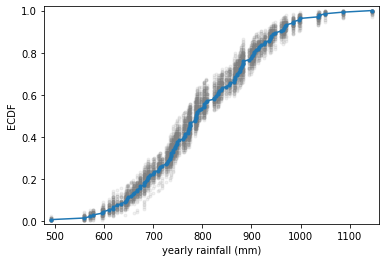

In [29]:
rainfall = np.array([
    875.5, 648.2, 788.1, 940.3, 491.1, 743.5, 730.1, 686.5, 878.8, 865.6,
    654.9, 831.5, 798.1, 681.8, 743.8, 689.1, 752.1, 837.2, 710.6, 749.2,
    967.1, 701.2, 619., 747.6, 803.4, 645.6, 804.1, 787.4, 646.8, 997.1, 774.,
    734.5, 835., 840.7, 659.6, 828.3, 909.7, 856.9, 578.3, 904.2, 883.9, 740.1,
    773.9, 741.4, 866.8, 871.1, 712.5, 919.2, 927.9, 809.4, 633.8, 626.8,
    871.3, 774.3, 898.8, 789.6, 936.3, 765.4, 882.1, 681.1, 661.3, 847.9,
    683.9, 985.7, 771.1, 736.6, 713.2, 774.5, 937.7, 694.5, 598.2, 983.8,
    700.2, 901.3, 733.5, 964.4, 609.3, 1035.2, 718., 688.6, 736.8, 643.3,
    1038.5, 969., 802.7, 876.6, 944.7, 786.6, 770.4, 808.6, 761.3, 774.2,
    559.3, 674.2, 883.6, 823.9, 960.4, 877.8, 940.6, 831.8, 906.2, 866.5,
    674.1, 998.1, 789.3, 915., 737.1, 763., 666.7, 824.5, 913.8, 905.1, 667.8,
    747.4, 784.7, 925.4, 880.2, 1086.9, 764.4, 1050.1, 595.2, 855.2, 726.9,
    785.2, 948.8, 970.6, 896., 618.4, 572.4, 1146.4, 728.2, 864.2, 793.
])

for _ in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none', color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

Good job! Notice how the bootstrap samples give an idea of how the distribution of rainfalls is spread.

### Bootstrap confidence intervals

**Confidence interval of a statistic**
- If we repeated measurements over and over again, p% of the observed values would lie within the p% confidence interval.

<img src='figures/02.02-confidence-intervals.PNG' width='70%'>

#### Practice

**Generating many bootstrap replicates**

The function bootstrap_replicate_1d() from the video is available in your namespace. Now you'll write another function, draw_bs_reps(data, func, size=1), which generates many bootstrap replicates from the data set. This function will come in handy for you again and again as you compute confidence intervals and later when you do hypothesis tests.

For your reference, the bootstrap_replicate_1d() function is provided below:
```
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)
```

Instructions
- Define a function with call signature draw_bs_reps(data, func, size=1).
- Using np.empty(), initialize an array called bs_replicates of size size to hold all of the bootstrap replicates.
- Write a for loop that ranges over size and computes a replicate using bootstrap_replicate_1d(). Refer to the exercise description above to see the function signature of bootstrap_replicate_1d(). Store the replicate in the appropriate index of bs_replicates.
- Return the array of replicates bs_replicates. This has already been done for you.

Hint
- The function signature has already been specified for you. Use np.empty(), passing in size as an argument, to initialze bs_replicates. Then, in the for loop, iterate over size using the range() function, and utilize the bootstrap_replicate_1d function, with data and func as arguments, to generate bootstrap replicates.

In [32]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

Good job! This function will be a workhorse for you!



**Bootstrap replicates of the mean and the SEM**

In this exercise, you will compute a bootstrap estimate of the probability density function of the mean annual rainfall at the Sheffield Weather Station. Remember, we are estimating the mean annual rainfall we would get if the Sheffield Weather Station could repeat all of the measurements from 1883 to 2015 over and over again. This is a probabilistic estimate of the mean. You will plot the PDF as a histogram, and you will see that it is Normal.

In fact, it can be shown theoretically that under not-too-restrictive conditions, the value of the mean will always be Normally distributed. (This does not hold in general, just for the mean and a few other statistics.) The standard deviation of this distribution, called the **standard error of the mean, or SEM,** is given by the standard deviation of the data divided by the square root of the number of data points. I.e., for a data set, sem = np.std(data) / np.sqrt(len(data)). Using hacker statistics, you get this same result without the need to derive it, but you will verify this result from your bootstrap replicates.

The dataset has been pre-loaded for you into an array called rainfall.

Instructions
- Draw 10000 bootstrap replicates of the mean annual rainfall using your draw_bs_reps() function and the rainfall array. Hint: Pass in np.mean for func to compute the mean.
- As a reminder, draw_bs_reps() accepts 3 arguments: data, func, and size.
- Compute and print the standard error of the mean of rainfall.
- The formula to compute this is np.std(data) / np.sqrt(len(data)).
- Compute and print the standard deviation of your bootstrap replicates bs_replicates.
- Make a histogram of the replicates using the normed=True keyword argument and 50 bins.
- Hit 'Submit Answer' to see the plot!

Hint
- draw_bs_reps accepts 3 arguments: data, func, and size. Use np.mean for func as you are asked to draw bootstrap replicates of the mean annual rainfall. Size refers to the number of bootstrap replicates you need to draw, and the name of the dataset here is rainfall.
- The standard error of the mean (SEM) is calculated by dividing the standard deviation (np.std()) of rainfall by the square root (np.sqrt()) of the number of points in rainfall (len(rainfall)).
- Use np.std() to calculate the standard deviation of bs_replicates.
- Be sure to specify all arguments in plt.hist(), including the correct bin size and normed=True.

10.510549150506188
10.606367837389184


C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:13: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  del sys.path[0]


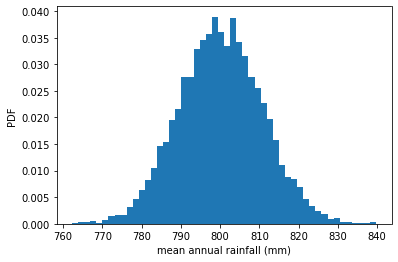

In [44]:
# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.mean, size=10000)

# Compute and print SEM
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = np.std(bs_replicates)
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

Great work! Notice that the SEM we got from the known expression and the bootstrap replicates is the same and the distribution of the bootstrap replicates of the mean is Normal.

**Confidence intervals of rainfall data**

A confidence interval gives upper and lower bounds on the range of parameter values you might expect to get if we repeat our measurements. For named distributions, you can compute them analytically or look them up, but one of the many beautiful properties of the bootstrap method is that you can take percentiles of your bootstrap replicates to get your confidence interval. Conveniently, you can use the np.percentile() function.

Use the bootstrap replicates you just generated to compute the 95% confidence interval. That is, give the 2.5th and 97.5th percentile of your bootstrap replicates stored as bs_replicates. What is the 95% confidence interval?

Possible Answers
- (765, 776) mm/year
- (780, 821) mm/year
- (761, 817) mm/year
- (761, 841) mm/year

Hint
- To get the 2.5th and 97.5th percentiles of x, the statement would be `np.percentile(x, [2.5, 97.5])`. This gives the 95% confidence interval of x. Do the same for bs_replicates.

In [35]:
np.percentile(bs_replicates, [2.5, 97.5])

array([779.35005639, 820.78142857])

Correct! See, it's simple to get confidence intervals using bootstrap!

**Bootstrap replicates of other statistics**

We saw in a previous exercise that the mean is Normally distributed. This does not necessarily hold for other statistics, but no worry: as hackers, we can always take bootstrap replicates! In this exercise, you'll generate bootstrap replicates for the variance of the annual rainfall at the Sheffield Weather Station and plot the histogram of the replicates.

Here, you will make use of the draw_bs_reps() function you defined a few exercises ago. It is provided below for your reference:
```
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    # Initialize array of replicates
    bs_replicates = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates
```

Instructions
- Draw 10000 bootstrap replicates of the variance in annual rainfall, stored in the rainfall dataset, using your draw_bs_reps() function. Hint: Pass in np.var for computing the variance.
- Divide your variance replicates (bs_replicates) by 100 to put the variance in units of square centimeters for convenience.
- Make a histogram of bs_replicates using the normed=True keyword argument and 50 bins.

Hint
- In a previous exercise, you drew 10000 bootstrap replicates of the mean annual rainfall, where func in draw_bs_reps() was np.mean. Here, since you have to draw replicates of the variance in annual rainfall instead of the mean, func needs to be np.var.
- NumPy's vectorized operations make it easy to divide all of the variance replicates by 100. For example, to double the replicates the statement would be bs_replicates *= 2.
- Be sure to include all 3 arguments inside plt.hist(), including the correct bin size and normed=True.

C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


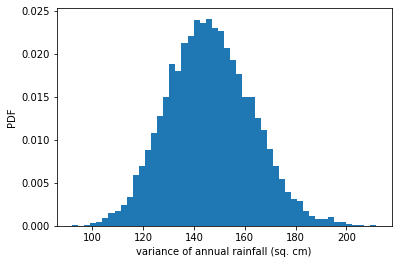

In [43]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    # Initialize array of replicates
    bs_replicates = np.empty(size)
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates

# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.var, size=10000)

# Put the variance in units of square centimeters
bs_replicates /= 100

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

Great work! This is not normally distributed, as it has a longer tail to the right. Note that you can also compute a confidence interval on the variance, or any other statistic, using np.percentile() with your bootstrap replicates.

**Confidence interval on the rate of no-hitters**

Consider again the inter-no-hitter intervals for the modern era of baseball. Generate 10,000 bootstrap replicates of the optimal parameter . Plot a histogram of your replicates and report a 95% confidence interval.

Instructions
- Generate 10000 bootstrap replicates of  from the nohitter_times data using your draw_bs_reps() function. Recall that the optimal  is calculated as the mean of the data.
- Compute the 95% confidence interval using np.percentile() and passing in two arguments: The array bs_replicates, and the list of percentiles - in this case 2.5 and 97.5.
- Print the confidence interval.
- Plot a histogram of your bootstrap replicates. This has been done for you, so hit 'Submit Answer' to see the plot!

Hint
- Use your draw_bs_reps() function similar to when you were asked to draw replicates of the mean annual rainfall. Here,  is the same as np.mean.
- Be sure to pass in the 2.5th and 97.5th percentiles of bs_replicates in the form of a list ([2.5, 97.5]) as arguments to np.percentile().
- Print the confidence interval you calculated above by passing in conf_int as an argument to the provided print() function.
- Make sure all required arguments are provided inside plt.hist(), and hit 'Submit Answer` to view your plot!

95% confidence interval = [663.02370518 874.74143426] games


C:\Users\LENOVO\anaconda3\lib\site-packages\ipykernel_launcher.py:11: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  # This is added back by InteractiveShellApp.init_path()


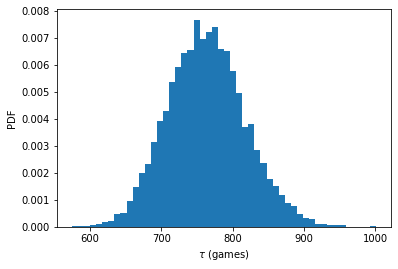

In [41]:
# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(nohitter_times, np.mean, size=10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, normed=True)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

95% confidence interval = [661.94053785 874.05258964] games


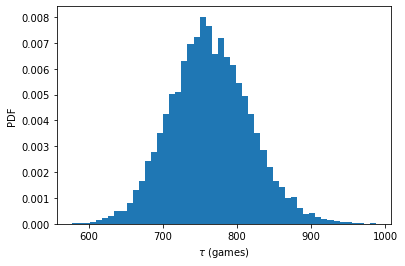

In [42]:
# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(nohitter_times, np.mean, size=10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

This gives you an estimate of what the typical time between no-hitters is. It could be anywhere between 660 and 870 games.

### Pairs bootstrap (FALTA)

## Introduction to hypothesis testing


### Formulating and simulating hypothesis

**2008 US swing state election results**
<img src='figures/02.01-linearreg.PNG' width='400'>

**Hypothesis testing**
- Assesment of how reasonable the observed data are assuming a hypothesis is true

**Null hypothesis**
- Another name for the hypothesis you are testing

**ECDFs of swing state election results**
<img src='figures/02.03-ecdf-data.PNG' width='400'>

 **Simulating the hypothesis with Permutations**
 - Random reordering of entries in an array

**Generating a permutation sample**

In the video, you learned that permutation sampling is a great way to simulate the hypothesis that two variables have identical probability distributions. This is often a hypothesis you want to test, so in this exercise, you will write a function to generate a permutation sample from two data sets.

Remember, a permutation sample of two arrays having respectively n1 and n2 entries is constructed by concatenating the arrays together, scrambling the contents of the concatenated array, and then taking the first n1 entries as the permutation sample of the first array and the last n2 entries as the permutation sample of the second array.

Instructions
- Concatenate the two input arrays into one using np.concatenate(). Be sure to pass in data1 and data2 as one argument (data1, data2).
- Use np.random.permutation() to permute the concatenated array.
- Store the first len(data1) entries of permuted_data as perm_sample_1 and the last len(data2) entries of permuted_data as perm_sample_2. In practice, this can be achieved by using :len(data1) and len(data1): to slice permuted_data.
- Return perm_sample_1 and perm_sample_2.

Hint
- To concatenate the two input arrays - data1 and data2 - pass them in as one argument (data1, data2) to np.concatenate().
- To permute the array, pass in the concatenated array (data) as an argument to np.random.permutation().
- Split the array by indexing it such that the first half (permuted_data[:len(data1)]) goes to perm_sample_1 and the second half (permuted_data[len(data1):]) to perm_sample_2.

In [47]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

**Visualizing permutation sampling**

To help see how permutation sampling works, in this exercise you will generate permutation samples and look at them graphically.

We will use the Sheffield Weather Station data again, this time considering the monthly rainfall in June (a dry month) and November (a wet month). We expect these might be differently distributed, so we will take permutation samples to see how their ECDFs would look if they were identically distributed.

The data are stored in the Numpy arrays rain_june and rain_november.

As a reminder, permutation_sample() has a function signature of permutation_sample(data_1, data_2) with a return value of permuted_data[:len(data_1)], permuted_data[len(data_1):], where permuted_data = np.random.permutation(np.concatenate((data_1, data_2))).

Instructions
- Write a for loop to generate 50 permutation samples, compute their ECDFs, and plot them.
- Generate a permutation sample pair from rain_june and rain_november using your permutation_sample() function.
- Generate the x and y values for an ECDF for each of the two permutation samples for the ECDF using your ecdf() function.
- Plot the ECDF of the first permutation sample (x_1 and y_1) as dots. Do the same for the second permutation sample (x_2 and y_2).
- Generate x and y values for ECDFs for the rain_june and rain_november data and plot the ECDFs using respectively the keyword arguments color='red' and color='blue'.
- Label your axes, set a 2% margin, and show your plot. This has been done for you, so just hit 'Submit Answer' to view the plot!

Hint
- Pass in rain_june and rain_november as arguments to the permutation_sample() function defined in the previous exercise. Use the ecdf function to generate x and y values for the two permutation samples, and when plotting these values, be sure to specify the color and alpha keyword arguments as described in the instructions.
- Having generated the x and y values from the ECDFs of the permutation samples, now generate them from the ECDFs of the actual data.
- The margins and axes have been written for you, so just hit 'Submit Answer' to see your plot!

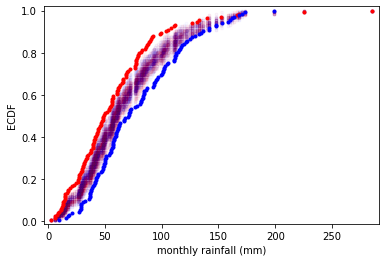

In [48]:
rain_june = np.array([
    66.2, 39.7, 76.4, 26.5, 11.2, 61.8, 6.1, 48.4, 89.2, 104., 34., 60.6, 57.1,
    79.1, 90.9, 32.3, 63.8, 78.2, 27.5, 43.4, 30.1, 17.3, 77.5, 44.9, 92.2,
    39.6, 79.4, 66.1, 53.5, 98.5, 20.8, 55.5, 39.6, 56., 65.1, 14.8, 13.2,
    88.1, 8.4, 32.1, 19.6, 40.4, 2.2, 77.5, 105.4, 77.2, 38., 27.1, 111.8,
    17.2, 26.7, 23.3, 77.2, 87.2, 27.7, 50.6, 60.3, 15.1, 6., 29.4, 39.3, 56.3,
    80.4, 85.3, 68.4, 72.5, 13.3, 28.4, 14.7, 37.4, 49.5, 57.2, 85.9, 82.1,
    31.8, 126.6, 30.7, 41.4, 33.9, 13.5, 99.1, 70.2, 91.8, 61.3, 13.7, 54.9,
    62.5, 24.2, 69.4, 83.1, 44., 48.5, 11.9, 16.6, 66.4, 90., 34.9, 132.8,
    33.4, 225., 7.6, 40.9, 76.5, 48., 140., 55.9, 54.1, 46.4, 68.6, 52.2,
    108.3, 14.6, 11.3, 29.8, 130.9, 152.4, 61., 46.6, 43.9, 30.9, 111.1, 68.5,
    42.2, 9.8, 285.6, 56.7, 168.2, 41.2, 47.8, 166.6, 37.8, 45.4, 43.2
])

rain_november = np.array([
    83.6, 30.9, 62.2, 37., 41., 160.2, 18.2, 122.4, 71.3, 44.2, 49.1, 37.6,
    114.5, 28.8, 82.5, 71.9, 50.7, 67.7, 112., 63.6, 42.8, 57.2, 99.1, 86.4,
    84.4, 38.1, 17.7, 102.2, 101.3, 58., 82., 101.4, 81.4, 100.1, 54.6, 39.6,
    57.5, 29.2, 48.8, 37.3, 115.4, 55.6, 62., 95., 84.2, 118.1, 153.2, 83.4,
    104.7, 59., 46.4, 50., 147.6, 76.8, 59.9, 101.8, 136.6, 173., 92.5, 37.,
    59.8, 142.1, 9.9, 158.2, 72.6, 28., 112.9, 119.3, 199.2, 50.7, 44., 170.7,
    67.2, 21.4, 61.3, 15.6, 106., 116.2, 42.3, 38.5, 132.5, 40.8, 147.5, 93.9,
    71.4, 87.3, 163.7, 141.4, 62.6, 84.9, 28.8, 121.1, 28.6, 32.4, 112., 50.,
    96.9, 81.8, 70.4, 117.5, 41.2, 124.9, 78.2, 93., 53.5, 50.5, 42.6, 47.9,
    73.1, 129.1, 56.9, 103.3, 60.5, 134.3, 93.1, 49.5, 48.2, 167.9, 27., 111.1,
    55.4, 36.2, 57.4, 66.8, 58.3, 60., 161.6, 112.7, 37.4, 110.6, 56.6, 95.8,
    126.8
])

for _ in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june, rain_november)

    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    _ = plt.plot(x_1,
                 y_1,
                 marker='.',
                 linestyle='none',
                 color='red',
                 alpha=0.02)
    _ = plt.plot(x_2,
                 y_2,
                 marker='.',
                 linestyle='none',
                 color='blue',
                 alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
_ = plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

Great work! Notice that the permutation samples ECDFs overlap and give a purple haze. None of the ECDFs from the permutation samples overlap with the observed data, suggesting that the hypothesis is not commensurate with the data. June and November rainfall are not identically distributed.

### Test statistics and p-values

**Hypothesis testing**
- Assesment of how reasonable the observed data are assuming a hypothesis is true

**Test statistic**
- A single number that can be computed from observed data and from data you simulate under the null hypothesis
- It serves as a basis of comparison between the two

Permutation replicate
```
np.mean(perm_sample_PA) - np.mean(perm_sample_OH)
1.122220149253728 # permutation replicate

np.mean(dem_share_PA) - np.mean(dem_share_OH) # orig. data
1.1582360922659518
```

**Mean vote difference under null hypothesis**\
Differences in means: 1.16
<img src='figures/02.03-mean-under-null-hypothesis.PNG' width='400'>

**p-value**
- The probability of obtaining a value of your test statistic that is at least as extreme as what was observed, under the assumption the null hypothesis is true
- **NOT** the probability that the null hypothesis is true

**Statistical significance**
- Determined by the smallness of a p-value

**Null hypothesis significance testing (NHST)**
- Another name for what we are doing in this chapter

**statistical significance (low p values) ? practical significance = two different things**

**Test statistics**

When performing hypothesis tests, your choice of test statistic should be:

Answer the question
- something well-known, like the mean or median.
- be a parameter that can be estimated.
- **be pertinent to the question you are seeking to answer in your hypothesis test.**

Yes! The most important thing to consider is: What are you asking?

**What is a p-value?**

The p-value is generally a measure of:

Answer the questions

- the probability that the hypothesis you are testing is true.
- the probability of observing your data if the hypothesis you are testing is true.
- **the probability of observing a test statistic equally or more extreme than the one you observed, given that the null hypothesis is true.**

**Generating permutation replicates**

As discussed in the video, a permutation replicate is a single value of a statistic computed from a permutation sample. As the draw_bs_reps() function you wrote in chapter 2 is useful for you to generate bootstrap replicates, it is useful to have a similar function, draw_perm_reps(), to generate permutation replicates. You will write this useful function in this exercise.

The function has call signature draw_perm_reps(data_1, data_2, func, size=1). Importantly, func must be a function that takes two arrays as arguments. In most circumstances, func will be a function you write yourself.

Instructions
- Define a function with this signature: draw_perm_reps(data_1, data_2, func, size=1).
- Initialize an array to hold the permutation replicates using np.empty().
- Write a for loop to:
    - Compute a permutation sample using your permutation_sample() function
    - Pass the samples into func() to compute the replicate and store the result in your array of replicates.
- Return the array of replicates.

Hint
- Use np.empty() to initialize your array, passing in size as an argument.
- Inside the for loop, pass in data_1 and data_2 as arguments to the permutation_sample() function you defined in an earlier exercise. The values that they return - perm_sample_1 and perm_sample_2 - should in turn be passed as arguments to func - this is how the test statistic is computed. Be sure to index permutation_samples appropriately with i.

In [49]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

**Look before you leap: EDA before hypothesis testing**

Kleinteich and Gorb (Sci. Rep., 4, 5225, 2014) performed an interesting experiment with South American horned frogs. They held a plate connected to a force transducer, along with a bait fly, in front of them. They then measured the impact force and adhesive force of the frog's tongue when it struck the target.

Frog A is an adult and Frog B is a juvenile. The researchers measured the impact force of 20 strikes for each frog. In the next exercise, we will test the hypothesis that the two frogs have the same distribution of impact forces. But, remember, it is important to do EDA first! Let's make a bee swarm plot for the data. They are stored in a Pandas data frame, df, where column ID is the identity of the frog and column impact_force is the impact force in Newtons (N).

Instructions
- Use sns.swarmplot() to make a bee swarm plot of the data by specifying the x, y, and data keyword arguments.
- Label your axes.
- Show the plot.

Hint
- You need to specify three arguments inside sns.swarmplot(): the data (df), x-axis (ID), and y-axis (impact_force).
- Use plt.xlabel('x-axis label') and plt.ylabel('y-axis label') to label your axes.
- You can display the plot with plt.show().

In [66]:
import pandas as pd

df = pd.read_csv('data/02-frogs.csv')
df

,ID,impact_force
0,A,1.612
1,A,0.605
2,A,0.327
3,A,0.946
4,A,0.541
5,A,1.539
6,A,0.529
7,A,0.628
8,A,1.453
9,A,0.297


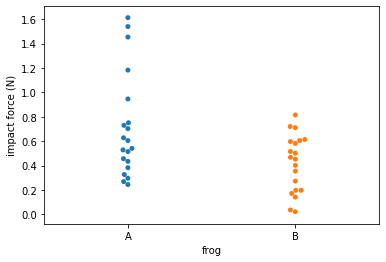

In [67]:
import seaborn as sns

# Make bee swarm plot
_ = sns.swarmplot(x='ID', y='impact_force', data=df)

# Label axes
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (N)')

# Show the plot
plt.show()

Eyeballing it, it does not look like they come from the same distribution. Frog A, the adult, has three or four very hard strikes, and Frog B, the juvenile, has a couple weak ones. However, it is possible that with only 20 samples it might be too difficult to tell if they have difference distributions, so we should proceed with the hypothesis test.

**Permutation test on frog data**

The average strike force of Frog A was 0.71 Newtons (N), and that of Frog B was 0.42 N for a difference of 0.29 N. It is possible the frogs strike with the same force and this observed difference was by chance. You will compute the probability of getting at least a 0.29 N difference in mean strike force under the hypothesis that the distributions of strike forces for the two frogs are identical. We use a permutation test with a test statistic of the difference of means to test this hypothesis.

For your convenience, the data has been stored in the arrays force_a and force_b.

Instructions
- Define a function with call signature diff_of_means(data_1, data_2) that returns the differences in means between two data sets, mean of data_1 minus mean of data_2.
- Use this function to compute the empirical difference of means that was observed in the frogs.
- Draw 10,000 permutation replicates of the difference of means.
- Compute the p-value.
- Print the p-value.

Hint
- Use np.mean() to calculate the difference between the mean of data_1 and the mean of data_2, and store the result in diff.
- The arrays force_a and force_b contain the data from the the experiment. Use these in place of data_1 and data_2 in the diff_of_means() function you just defined.
- Use the function draw_perm_reps() to draw the desired number of permutation replicates. func here is diff_of_means, while the two data arrays are force_a and force_b.
- To compute the p-value, you need to calculate the number of perm_replicates that were >= the empirical_diff_means. You can use the provided np.sum() for this purpose. The result of this is then divided by the total number of permutation replicates (len(perm_replicates)).

In [69]:
force_a = np.array([
    1.612, 0.605, 0.327, 0.946, 0.541, 1.539, 0.529, 0.628, 1.453, 0.297,
    0.703, 0.269, 0.751, 0.245, 1.182, 0.515, 0.435, 0.383, 0.457, 0.73
])
force_b = np.array([
    0.172, 0.142, 0.037, 0.453, 0.355, 0.022, 0.502, 0.273, 0.72, 0.582, 0.198,
    0.198, 0.597, 0.516, 0.815, 0.402, 0.605, 0.711, 0.614, 0.468
])


def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff


# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b, diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.0056


The p-value tells you that there is about a 0.6% chance that you would get the difference of means observed in the experiment if frogs were exactly the same. A p-value below 0.01 is typically said to be "statistically significant," but: warning! warning! warning! You have computed a p-value; it is a number. I encourage you not to distill it to a yes-or-no phrase. p = 0.006 and p = 0.000000006 are both said to be "statistically significant," but they are definitely not the same!

### Bootstrap hypothesis tests

## Hypothesis test examples

## Putting it all together: a case study